In [3]:
import pandas as pd

data = pd.read_csv("2016.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [5]:
data.describe()


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


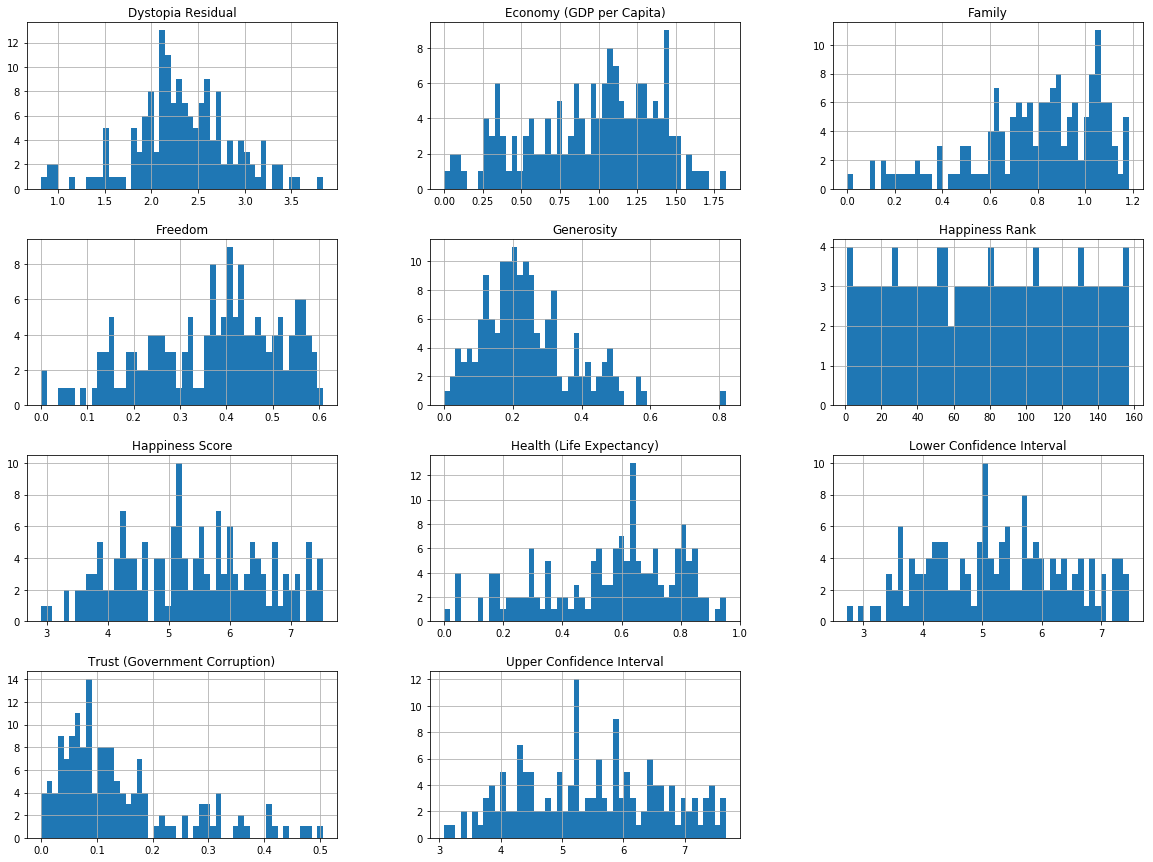

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
import hashlib
import numpy as np
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [8]:
data_with_id = data.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [9]:
print("length of train_set: ", len(train_set))
print("length of test_set: ", len(test_set))

length of train_set:  126
length of test_set:  31


Preparing the data

In [10]:
data = train_set.drop(["Happiness Score","Happiness Rank","Lower Confidence Interval","Upper Confidence Interval"], axis = 1) # drop labels for training set
data_labels = train_set["Happiness Score"].copy()

In [11]:
#using Imputer to change 0 (assumed as null input data) to mean instead
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="mean", missing_values = 0)

In [12]:
data_num = data.drop(['Country','Region'], axis=1)
data_num.head()

,index,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,1,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,3,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
6,6,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749


In [13]:
imputer.fit(data_num)

SimpleImputer(copy=True, fill_value=None, missing_values=0, strategy='mean',
       verbose=0)

In [14]:
imputer.statistics_

array([77.808     ,  0.96629936,  0.80337   ,  0.55659627,  0.37005754,
        0.13839192,  0.23925352,  2.33970198])

In [15]:
data_num.mean().values

array([77.19047619,  0.95863032,  0.80337   ,  0.55659627,  0.37005754,
        0.13729357,  0.23735468,  2.33970198])

In [16]:
X = imputer.transform(data_num)

In [17]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index = list(data.index.values))

In [18]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean", missing_values = 0))
    ])

data_prepared = num_pipeline.fit_transform(data_num)

In [19]:
data_prepared

array([[7.78080e+01, 1.44178e+00, 1.16374e+00, ..., 4.44530e-01,
        3.61710e-01, 2.73939e+00],
       [1.00000e+00, 1.52733e+00, 1.14524e+00, ..., 4.12030e-01,
        2.80830e-01, 2.69463e+00],
       [2.00000e+00, 1.42666e+00, 1.18326e+00, ..., 1.49750e-01,
        4.76780e-01, 2.83137e+00],
       ...,
       [1.52000e+02, 3.94990e-01, 1.04190e-01, ..., 6.68100e-02,
        2.01800e-01, 2.10812e+00],
       [1.55000e+02, 7.47190e-01, 1.48660e-01, ..., 1.72330e-01,
        4.83970e-01, 8.17890e-01],
       [1.56000e+02, 6.83100e-02, 2.34420e-01, ..., 9.41900e-02,
        2.02900e-01, 2.10404e+00]])

Select and train a model

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.07508752718867392

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

In [23]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.2472652  0.03402838 0.19476162 0.07293785 0.05600362]
Mean: 0.12099933680589281
Standard deviation: 0.084240418611662


Try with Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [25]:
scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [26]:
display_scores(tree_rmse_scores)

Scores: [0.73407404 0.37174717 1.63433988 0.22955252 0.53116254]
Mean: 0.7001752292041786
Standard deviation: 0.4963322948090468


Try with Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.75151764 0.18198888 0.54016973 0.23222955 0.55265153]
Mean: 0.45171146589156486
Standard deviation: 0.21392525981811314


    Fine-Tuning: GridSearchCV using Linear Regression model

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 8 (2×2x2) combinations of hyperparameters
   {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
]

grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

c:\users\nipha\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1484924517292679 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.1484924517292683 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.10643540048224356 {'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.10643540048224356 {'copy_X': True, 'fit_intercept': False, 'normalize': False}
0.1484924517292679 {'copy_X': False, 'fit_intercept': True, 'normalize': True}
0.1484924517292683 {'copy_X': False, 'fit_intercept': True, 'normalize': False}
0.10643540048224356 {'copy_X': False, 'fit_intercept': False, 'normalize': True}
0.10643540048224356 {'copy_X': False, 'fit_intercept': False, 'normalize': False}


In [31]:
grid_search.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)

    Testing with the test set

In [35]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(["Happiness Score","Happiness Rank","Lower Confidence Interval","Upper Confidence Interval"], axis=1)
y_test = test_set["Happiness Score"].copy()

X_test_num = X_test.drop(['Country','Region'],axis=1)
X_test_prepared = num_pipeline.fit_transform(X_test_num)

final_predictions = final_model.predict(X_test_prepared)


final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [36]:
final_rmse

0.19838298070614963